<a href="https://colab.research.google.com/github/russelrouf/Machine_Learning_Final_Project/blob/main/Stock_Market_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project: Stock Market Data Analysis**

## Aim of the project:

 1.   Fetch historical data of stocks from remotely 
 2.   Plot the stock market data and analyse the performance
 3.   Analyse the fundamental, futures and options 

In [84]:
# Here I imported other libraries like: Pandas to handle data frame, Numpy for numerical data and Matplotlib for plotting graphs

import numpy as np
import datetime
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 
%matplotlib inline

In [85]:
# Importing historical data of 20 years for the stocks: Apple, IBM, Microsoft & Walmart from the Yahoo Finance server
import yfinance as yf

# Set the start and end date
start_date = '2001-01-01'
end_date = '2021-08-26'

# Define the ticker list
tickers_list = ['AAPL', 'IBM', 'MSFT', 'WMT']

# Create placeholder for data
data = pd.DataFrame(columns=tickers_list)

# Fetch the data
for ticker in tickers_list:
  data[ticker] = yf.download(ticker, start_date, end_date)['Close']
    
# Print first 5 rows of the data
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,IBM,MSFT,WMT
Date,,,,
2001-01-02,0.265625,84.8125,21.68750,53.8750
2001-01-03,0.292411,94.6250,23.96875,58.4375
2001-01-04,0.304688,93.1875,24.21875,56.1875
2001-01-05,0.292411,94.0000,24.56250,53.9375
2001-01-08,0.295759,93.5625,24.46875,53.9375


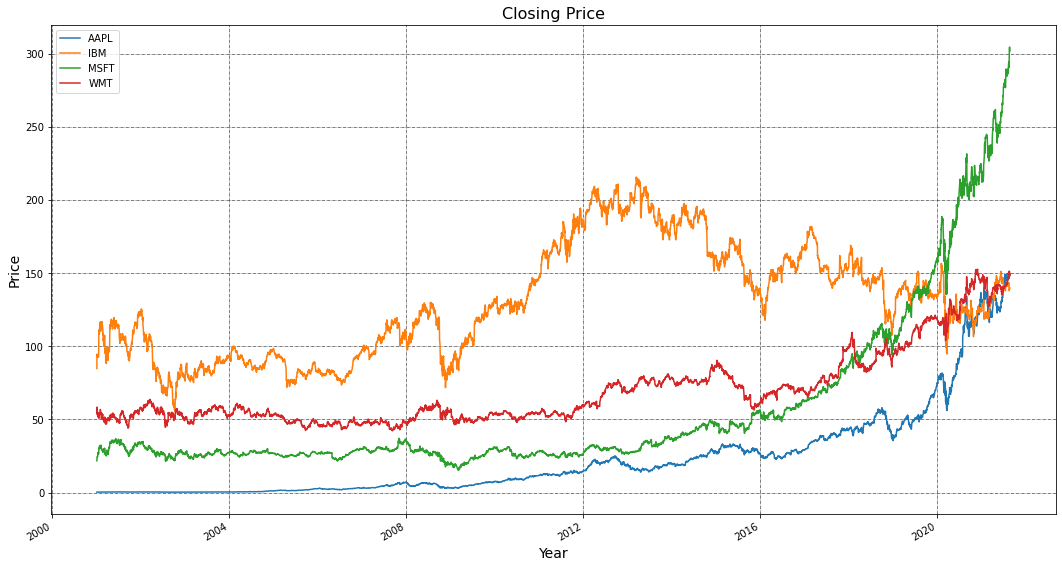

In [86]:
# Plot all the close prices
data.plot(figsize=(18, 10))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Closing Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# Stocks traded Volume comparison

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


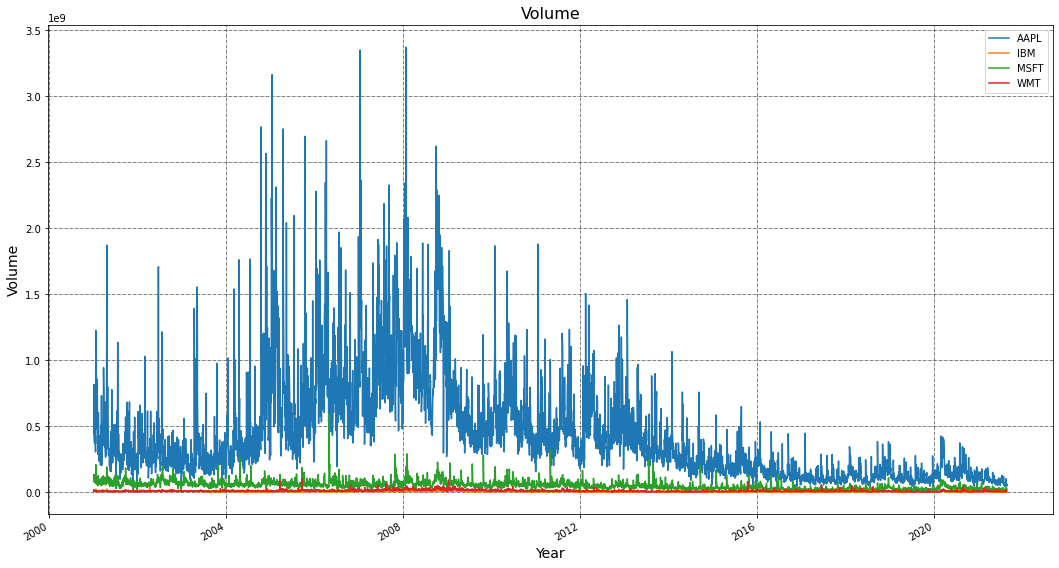

In [87]:
# Create placeholder for data
data = pd.DataFrame(columns=tickers_list)

# Fetch the data
for ticker in tickers_list:
  data[ticker] = yf.download(ticker, start_date, end_date)['Volume']

# Plot all the close prices
data.plot(figsize=(18, 10))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title('Volume', fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Volume', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [88]:
# Intraday or Minute Frequency Stock Data using yfinance module for 5 days period in 1 minute intervals.

import yfinance as yf
intraday_data = yf.download(tickers="MSFT",
period="5d",
interval="1m",
auto_adjust=True)
intraday_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2021-08-23 09:30:00-04:00,303.250000,303.380005,303.130096,303.380005,907859
2021-08-23 09:31:00-04:00,303.260010,303.579987,303.250000,303.464996,76620
2021-08-23 09:33:00-04:00,303.049988,303.119995,302.670013,302.799988,323975
2021-08-23 09:34:00-04:00,302.790009,303.500000,301.850006,302.661499,273866
2021-08-23 09:35:00-04:00,302.929993,303.329987,302.929993,303.269989,127448


# **Resample Stock Data**

In [89]:
# Converting 1-minute data to 1-hour data 

In [90]:
# Import package & get the data
import yfinance as yf
intraday_data = yf.download(tickers="MSFT", period="5d", interval="1m", auto_adjust=True)

# Define the resampling logic as the the columns in the dataframe
ohlcv_dict = {'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'}

# Resample the data as 10T for 10 minutes 
intraday_data_10 = intraday_data.resample('10T').agg(ohlcv_dict)
intraday_data_10.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2021-08-23 09:30:00-04:00,303.250000,304.989990,301.850006,304.859894,2243848
2021-08-23 09:40:00-04:00,305.000000,305.390015,303.684998,303.763306,1121697
2021-08-23 09:50:00-04:00,303.250000,304.079987,302.859985,304.010010,967060
2021-08-23 10:00:00-04:00,304.075989,304.880005,303.554504,304.450012,674344
2021-08-23 10:10:00-04:00,304.459991,304.629913,303.350006,303.749908,894213




# **Fundamental Data Analysis** (P/B, P/E, Income Statement, Balance Sheet, Cash Flow)


In [91]:
# Import yfinance
import yfinance as yf

# Set the ticker as MSFT
msft = yf.Ticker("MSFT")

# Price to book ratio
pb = msft.info['priceToBook']

# Price to earnings ratio
pe = msft.info['regularMarketPrice']/msft.info['trailingPE']

print('Price to Book Ratio is: %.2f' % pb)
print('Price to Earnings Ratio is: %.2f' % pe)

Price to Book Ratio is: 15.86
Price to Earnings Ratio is: 8.05


In [92]:
# show income statement
msft.financials

# show balance Sheet
msft.balance_sheet

# show cashflow
msft.cashflow


,2021-06-30,2020-06-30,2019-06-30,2018-06-30
Investments,2.876000e+09,6.980000e+09,5.400000e+08,6.557000e+09
Change To Liabilities,7.431000e+09,5.230000e+09,4.694000e+09,7.070000e+09
Total Cashflows From Investing Activities,-2.757700e+10,-1.222300e+10,-1.577300e+10,-6.061000e+09
Net Borrowings,-3.750000e+09,-5.518000e+09,-4.000000e+09,-1.020100e+10
Total Cash From Financing Activities,-4.848600e+10,-4.603100e+10,-3.688700e+10,-3.359000e+10
Change To Operating Activities,1.160000e+09,-6.730000e+08,-1.542000e+09,-4.590000e+08
Issuance Of Stock,1.693000e+09,1.343000e+09,1.142000e+09,1.002000e+09
Net Income,6.127100e+10,4.428100e+10,3.924000e+10,1.657100e+10
Change In Cash,6.480000e+08,2.220000e+09,-5.900000e+08,4.283000e+09
Repurchase Of Stock,-2.738500e+10,-2.296800e+10,-1.954300e+10,-1.072100e+10


**Moving Average**

[*********************100%***********************]  1 of 1 completed


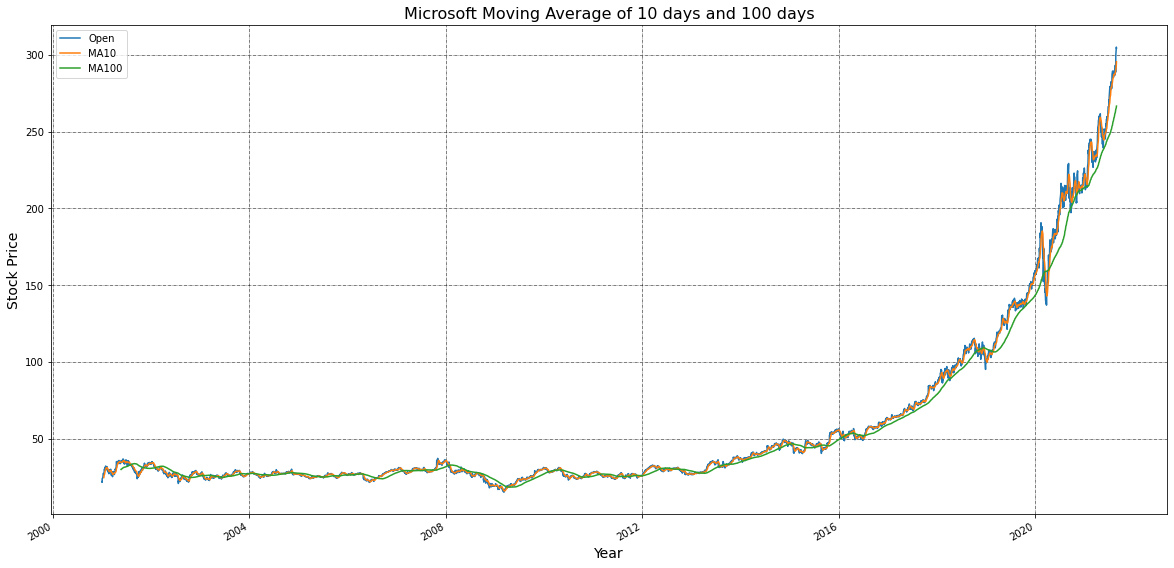

In [93]:
msft = yf.download('MSFT',start_date,end_date)

msft['MA10'] = msft['Open'].rolling(10).mean()
msft['MA100'] = msft['Open'].rolling(100).mean()

msft['Open'].plot(figsize = (20,10))
msft['MA10'].plot()
msft['MA100'].plot()
plt.legend()
plt.title('Microsoft Moving Average of 10 days and 100 days', fontsize=16)
plt.ylabel('Stock Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### Percentage increase in stock value
This is the change in stock comparing that to the previous day. The bigger the value either positive or negative the volatile the stock is.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


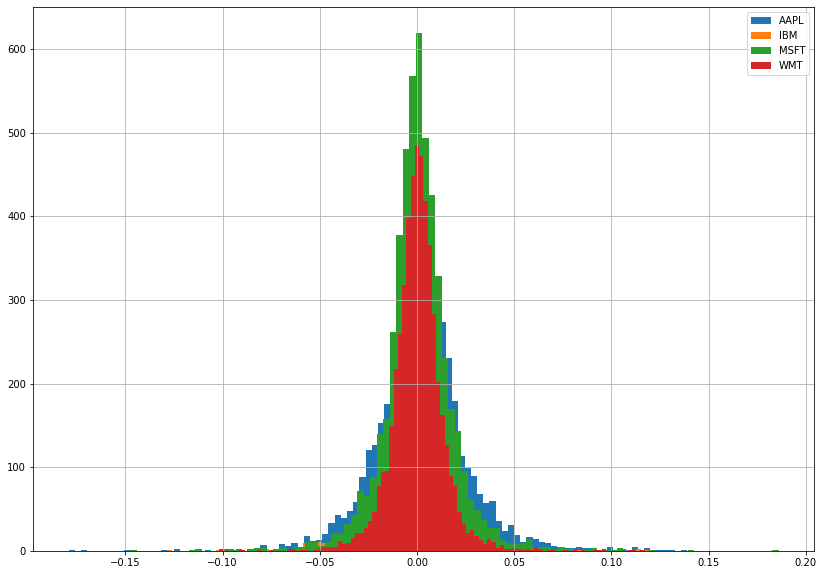

In [94]:
#Volatility

aapl = yf.download('AAPL',start_date,end_date)
ibm = yf.download('IBM',start_date,end_date)
msft = yf.download('MSFT',start_date,end_date)
wmt = yf.download('WMT',start_date,end_date)

aapl['returns'] = (aapl['Close']/aapl['Close'].shift(1)) -1
ibm['returns'] = (ibm['Close']/ibm['Close'].shift(1))-1
msft['returns'] = (msft['Close']/msft['Close'].shift(1)) - 1
wmt['returns'] = (wmt['Close']/wmt['Close'].shift(1)) - 1

aapl['returns'].hist(bins = 100, label = 'AAPL', alpha = 1, figsize = (14,10))
ibm['returns'].hist(bins = 100, label = 'IBM', alpha = 1)
msft['returns'].hist(bins = 100, label = 'MSFT', alpha = 1)
wmt['returns'].hist(bins = 100, label = 'WMT', alpha = 1)

plt.legend()

# Conclusion

All the above analysis can be used to understand a stock’s short-term and long-term behaviour. A decision support system can be created which stock to pick from industry for low-risk low gain or high-risk high gain depending on the risk apatite of the investor.